In [21]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from math import log10
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [16]:
data = pd.read_csv('autos.csv',sep=',',header = 0,encoding ='cp1252')
#data pre-processing : throw useless columns
data.drop(['dateCrawled','seller','offerType','abtest','notRepairedDamage','nrOfPictures','lastSeen','postalCode','dateCreated','model','monthOfRegistration'],axis = 'columns',inplace = True)
#drop duplicate 
dedups = data.drop_duplicates(['name','price','vehicleType','yearOfRegistration','gearbox','powerPS','kilometer','brand','fuelType'])
dedups = dedups[(dedups.yearOfRegistration <= 2016) 
      & (dedups.yearOfRegistration >= 1980) 
      & (dedups.price >= 1000) 
      & (dedups.price <= 150000) 
      & (dedups.powerPS >= 50)     # 
      & (dedups.powerPS <= 350)]   #
dedups = dedups.dropna()    #dedups is the final data we deal with

In [17]:
dedups['namelen'] = [min(75, len(n)) for n in dedups['name']]

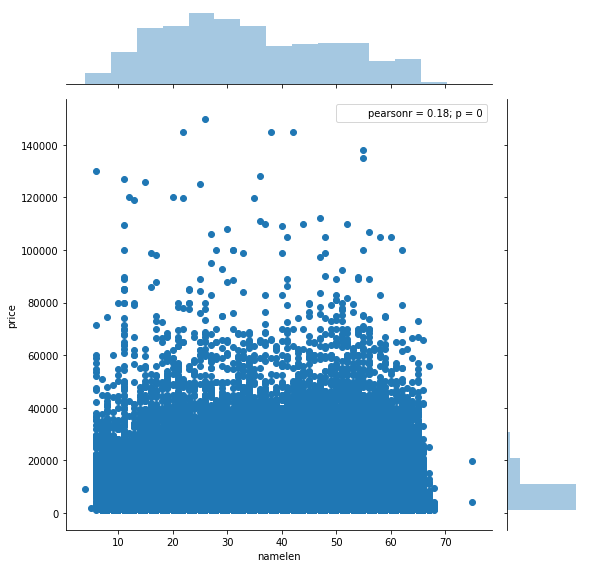

In [18]:
ax = sns.jointplot(x='namelen', 
                   y='price',
                   data=dedups[['namelen','price']], 
                   marginal_kws=dict(bins=15),
                   size = 8)


In [22]:
dedups['real_namelen'] = [len(n) for n in dedups['name']]
num_car = []
for i in range(15):
    num0 = dedups.loc[dedups.real_namelen<5*i].count()['name']
    num1 = dedups.loc[dedups.real_namelen<=5*(i+1)].count()['name']
    num_car.append(num1-num0)

In [8]:
objects = [i for i in range(0,15*5,5)]
y_pos = np.arange(len(objects))


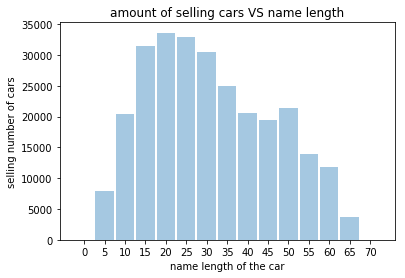

In [10]:
plt.bar(y_pos, num_car, alpha=0.4,width = 0.9)
plt.xticks(y_pos, objects)
plt.xlabel('name length of the car')
plt.ylabel('selling number of cars')
plt.title('amount of selling cars VS name length')
plt.show()

In [23]:
dedups

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,fuelType,brand,namelen,real_namelen
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,125000,diesel,audi,20,20
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatik,163,125000,diesel,jeep,30,30
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,150000,benzin,volkswagen,18,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,90000,diesel,skoda,30,30
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,150000,benzin,peugeot,27,27
8,Ford_C___Max_Titanium_1_0_L_EcoBoost,14500,bus,2014,manuell,125,30000,benzin,ford,36,36
10,Mazda_3_1.6_Sport,2000,limousine,2004,manuell,105,150000,benzin,mazda,17,17
11,Volkswagen_Passat_Variant_2.0_TDI_Comfortline,2799,kombi,2005,manuell,140,150000,diesel,volkswagen,45,45
14,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,17999,suv,2011,manuell,190,70000,diesel,nissan,65,65
17,Renault_Twingo_1.2_16V_Aut.,1750,kleinwagen,2004,automatik,75,150000,benzin,renault,27,27


In [86]:
dedups.real_namelen

1         20
2         30
3         18
4         30
6         27
8         36
10        17
11        45
14        65
17        27
18        32
19        33
20        33
21        55
25        37
27        30
28        20
30        41
33        13
34        41
38        55
39        20
42        13
43        34
44        35
46        12
47        16
49        28
50        27
53        32
          ..
371476    17
371477    27
371478    23
371479    35
371480    42
371481    65
371483    61
371485    17
371487    51
371488    41
371490    51
371491    31
371497    22
371500    58
371501    16
371503    16
371506    50
371507    55
371508    14
371510    54
371511    24
371512    34
371513    28
371515    21
371517    32
371520    12
371524    37
371525    34
371526    22
371527    44
Name: real_namelen, Length: 227329, dtype: int64

In [54]:
namelen_price_dict = defaultdict(list)
price_list = list(dedups.price)
namelen_list = list(dedups.real_namelen)
namelen_price = list(zip(namelen_list,price_list))

In [56]:
for length,price in namelen_price:
    namelen_price_dict[length].append(price)

In [68]:
namelen_average = {}
for d in namelen_price_dict:
    namelen_average[d] = sum(namelen_price_dict[d])/len(namelen_price_dict[d])
del namelen_average[20474]
del namelen_average[34700]

In [75]:
length = []
price = []
pair = []
for key,value in namelen_average.items():
    pair.append((key,value))

In [80]:
sortedpair = sorted(pair,key=lambda tup:tup[0])
for i in range(len(sortedpair)):
    length.append(sortedpair[i][0])
    price.append(sortedpair[i][1])

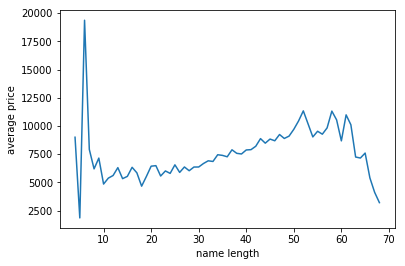

In [84]:
plt.plot(length,price)
plt.xlabel('name length')
plt.ylabel('average price')